# Movie Ratings

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
from bioinfokit.analys import stat

In [4]:
df = pd.read_csv('Movies.csv')
df

,Title,Year,Genre,Duration,Director,Rating,Popularity
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58
...,...,...,...,...,...,...,...
5270,Bloodline,2018,Crime,97,Henry Jacobson,6.0,64.69
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21
5272,You Might Be the Killer,2018,Comedy,92,Brett Simmons,5.9,61.14
5273,The Final Wish,2018,Horror,95,Timothy Woodward Jr.,4.2,54.68


In [26]:
df['Director'].value_counts(ascending=False).head(5)

Tyler Perry             15
John Lyde               10
Timothy Woodward Jr.    10
Joe Swanberg            10
James Franco             8
Name: Director, dtype: int64

In [4]:
# 1. Duration => Numeric to Categorical
# 2. Genres => Top 3 Genres

In [6]:
df['duration_cat'] = np.where(df.Duration < 90, 'short', np.where(df.Duration < 120, 'medium', 'long'))
df

,Title,Year,Genre,Duration,Director,Rating,Popularity,duration_cat
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83,short
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69,medium
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08,medium
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60,short
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58,long
...,...,...,...,...,...,...,...,...
5270,Bloodline,2018,Crime,97,Henry Jacobson,6.0,64.69,medium
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21,medium
5272,You Might Be the Killer,2018,Comedy,92,Brett Simmons,5.9,61.14,medium
5273,The Final Wish,2018,Horror,95,Timothy Woodward Jr.,4.2,54.68,medium


In [7]:
df.Genre.value_counts()

Comedy       1670
Drama        1187
Action        751
Horror        689
Crime         342
Biography     144
Animation     139
Adventure     139
Thriller       69
Fantasy        45
Sci-Fi         24
Mystery        22
Romance        21
Family         17
Music           6
Musical         5
Western         3
Sport           1
History         1
Name: Genre, dtype: int64

In [8]:
dftopgenres = df[df.Genre.isin(['Comedy','Drama','Action'])]
dftopgenres

,Title,Year,Genre,Duration,Director,Rating,Popularity,duration_cat
0,What Is It?,2005,Drama,72,Crispin Glover,5.6,21.83,short
1,Glitter,2001,Drama,104,Vondie Curtis-Hall,2.2,81.69,medium
2,The Attic Expeditions,2001,Comedy,100,Jeremy Kasten,5.0,42.08,medium
3,Men in Black II,2002,Action,88,Barry Sonnenfeld,6.2,98.60,short
4,Star Wars: Episode II - Attack of the Clones,2002,Action,142,George Lucas,6.5,99.58,long
...,...,...,...,...,...,...,...,...
5263,President Evil,2018,Comedy,81,Richard Lowry,4.0,15.02,short
5267,A Christmas Prince: The Royal Wedding,2018,Drama,92,John Schultz,5.3,70.36,medium
5268,Jurassic Galaxy,2018,Action,74,"James Kondelik, Jon Kondelik",2.3,2.59,short
5271,The Princess Switch,2018,Comedy,101,Mike Rohl,6.0,80.21,medium


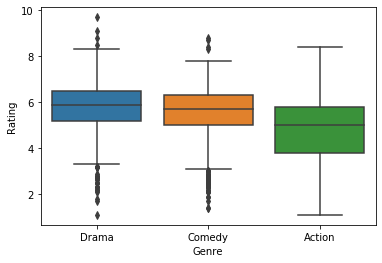

In [9]:
sns.boxplot(dftopgenres.Genre, dftopgenres.Rating)

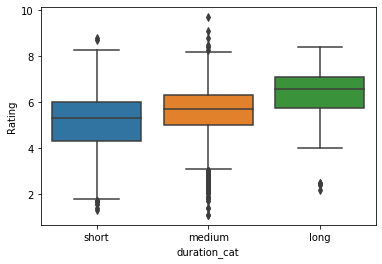

In [10]:
sns.boxplot(dftopgenres.duration_cat, dftopgenres.Rating)

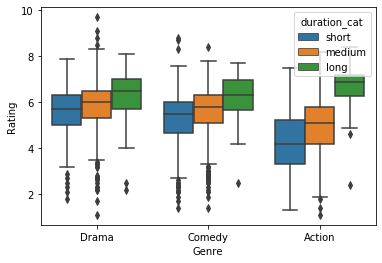

In [11]:
sns.boxplot(dftopgenres.Genre, dftopgenres.Rating, hue = dftopgenres.duration_cat)

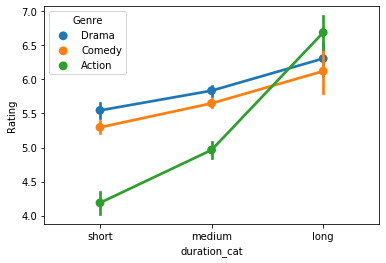

In [12]:
sns.pointplot(x = 'duration_cat', y = 'Rating', hue = 'Genre', data = dftopgenres)

In [13]:
# ANOVA - 1 way Genre

In [15]:
formula = 'Rating ~ C(Genre)'
model = ols(formula, dftopgenres).fit()
aov_table = anova_lm(model)
print(aov_table)

              df       sum_sq     mean_sq           F        PR(>F)
C(Genre)     2.0   434.410420  217.205210  168.303785  1.319696e-70
Residual  3605.0  4652.449023    1.290555         NaN           NaN


In [16]:
# ANOVA - 1 way Duration

In [17]:
formula = 'Rating ~ C(duration_cat)'
model = ols(formula, dftopgenres).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df       sum_sq     mean_sq           F        PR(>F)
C(duration_cat)     2.0   316.141969  158.070984  119.446583  5.908315e-51
Residual         3605.0  4770.717474    1.323361         NaN           NaN


In [18]:
# 2 Way ANOVA

In [19]:
formula = 'Rating ~ C(Genre) + C(duration_cat)'
model = ols(formula, dftopgenres).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df       sum_sq     mean_sq           F        PR(>F)
C(Genre)            2.0   434.410420  217.205210  180.029812  3.009753e-75
C(duration_cat)     2.0   305.444704  152.722352  126.583411  7.429675e-54
Residual         3603.0  4347.004319    1.206496         NaN           NaN


In [20]:
# Tukey HSD

In [21]:
res = stat()

In [23]:
res.tukey_hsd(df = dftopgenres,
              res_var = 'Rating',
              xfac_var = ['Genre', 'duration_cat'],
              anova_model = 'Rating ~ C(Genre) + C(duration_cat)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Drama, short)","(Drama, medium)",0.289337,0.059257,0.519417,5.519635,0.003108
1,"(Drama, short)","(Drama, long)",0.760809,0.334242,1.187375,7.828420,0.001000
2,"(Drama, short)","(Comedy, short)",0.248633,0.001993,0.495274,4.424670,0.046430
3,"(Drama, short)","(Comedy, medium)",0.103416,-0.117899,0.324732,2.050986,0.870478
4,"(Drama, short)","(Comedy, long)",0.575566,0.019911,1.131221,4.546481,0.035693
5,"(Drama, short)","(Action, short)",1.356295,1.063835,1.648756,20.355049,0.001000
6,"(Drama, short)","(Action, medium)",0.580632,0.326815,0.834449,10.040723,0.001000
7,"(Drama, short)","(Action, long)",1.142136,0.646141,1.638131,10.107082,0.001000
8,"(Drama, medium)","(Drama, long)",0.471471,0.074065,0.868877,5.207224,0.007242
9,"(Drama, medium)","(Comedy, short)",0.537971,0.346127,0.729814,12.308254,0.001000


In [24]:
df_res = res.tukey_summary

In [25]:
df_res[df_res['p-value']<0.05].shape

(30, 7)

In [26]:
df_res[df_res['p-value']>0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
3,"(Drama, short)","(Comedy, medium)",0.103416,-0.117899,0.324732,2.050986,0.870478
11,"(Drama, medium)","(Comedy, long)",0.286229,-0.247367,0.819825,2.354431,0.740371
17,"(Drama, long)","(Comedy, long)",0.185243,-0.457989,0.828474,1.264034,0.900000
20,"(Drama, long)","(Action, long)",0.381327,-0.211130,0.973784,2.825050,0.538590
26,"(Comedy, medium)","(Comedy, long)",0.472150,-0.057726,1.002026,3.911028,0.125558
32,"(Comedy, long)","(Action, long)",0.566570,-0.124660,1.257800,3.597627,0.211381


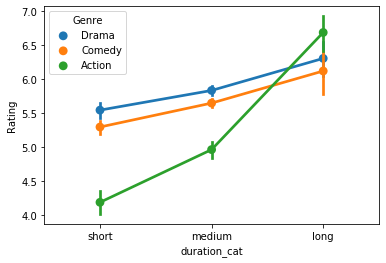

In [27]:
sns.pointplot(x = 'duration_cat', y = 'Rating', hue = 'Genre', data = dftopgenres)

In [28]:
# The End!